<a href="https://colab.research.google.com/github/AhmedAboushanab/Free-Work/blob/main/Lecture_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ahmedmoustafa/datasets/main/height_weight_sex/height_weight_sex.tsv', sep="\t")
df.head()

,Sex,Height_cm,Weight_kg
0,Male,177.392292,62.743209
1,Female,171.369067,50.258795
2,Male,181.652967,69.886259
3,Male,170.961674,64.599669
4,Male,168.711097,62.672186


In [2]:
# Importing the library used estimating statistical models
import statsmodels.api as sm

# Adding a constant term for the intercept to the height data
x_height = sm.add_constant(df['Height_cm'])

# Defining the dependent variable
y_weight = df['Weight_kg']

# Fitting the linear regression model (Ordinary Least Squares [OLS])
model_height = sm.OLS(y_weight, x_height).fit()

# Displaying the summary of the regression
print(model_height.summary())

                            OLS Regression Results                            
Dep. Variable:              Weight_kg   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     2069.
Date:                Sun, 22 Oct 2023   Prob (F-statistic):          1.62e-245
Time:                        14:32:42   Log-Likelihood:                -3069.2
No. Observations:                1000   AIC:                             6142.
Df Residuals:                     998   BIC:                             6152.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -78.5790      3.017    -26.046      0.0

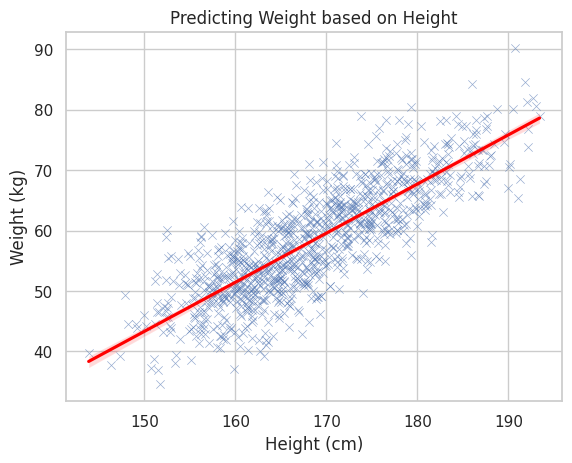

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating a scatter plot of height vs. weight
sns.scatterplot(x='Height_cm', y='Weight_kg', data=df, alpha=0.6, marker = 'x')

# Adding the linear regression line to the plot
sns.regplot(x='Height_cm', y='Weight_kg', data=df, scatter=False, color='red')

# Adding title and labels to the plot
plt.title('Predicting Weight based on Height')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')

# Showing the plot
plt.show()

In [4]:
# Converting the "Sex" variable to a numerical format using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded

,Height_cm,Weight_kg,Sex_Male
0,177.392292,62.743209,1
1,171.369067,50.258795,0
2,181.652967,69.886259,1
3,170.961674,64.599669,1
4,168.711097,62.672186,1
...,...,...,...
995,171.584620,59.010373,1
996,190.101157,70.526962,1
997,161.708086,51.392257,0
998,162.196782,54.515333,0


In [5]:
# Adding a constant term for the intercept
x_height_sex = sm.add_constant(df_encoded[['Height_cm', 'Sex_Male']])

# Fitting the linear regression model
model_height_sex = sm.OLS(y_weight, x_height_sex).fit()

# Displaying the summary of the regression
print(model_height_sex.summary())

                            OLS Regression Results                            
Dep. Variable:              Weight_kg   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     1139.
Date:                Sun, 22 Oct 2023   Prob (F-statistic):          2.83e-258
Time:                        14:44:29   Log-Likelihood:                -3035.7
No. Observations:                1000   AIC:                             6077.
Df Residuals:                     997   BIC:                             6092.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -55.6510      4.015    -13.859      0.0

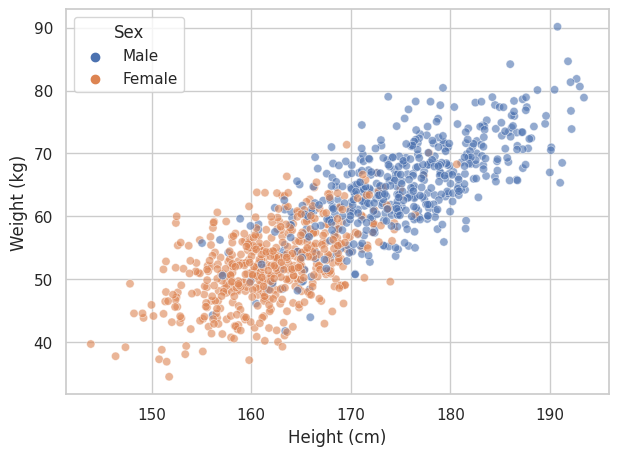

In [6]:
plt.figure(figsize=(7, 5))

# Creating separate scatter plots for males and females
sns.scatterplot(x='Height_cm', y='Weight_kg', hue='Sex', data=df, alpha=0.6)

plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

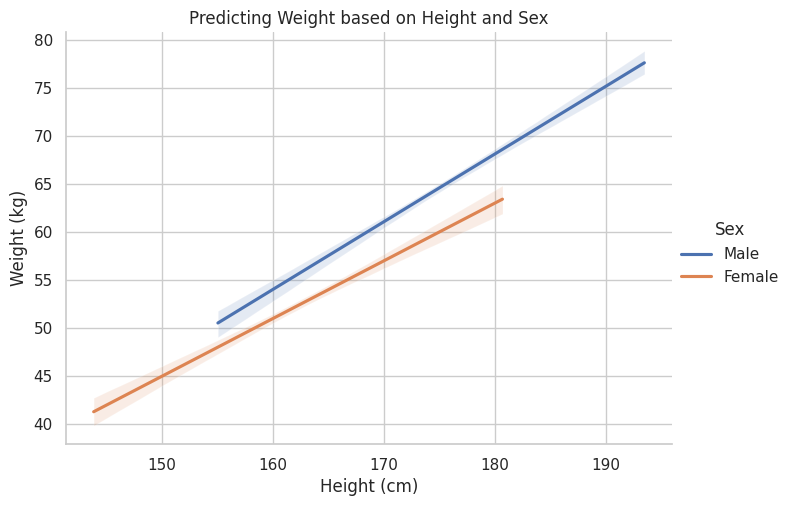

In [7]:
# Creating regression line for each sex
sns.lmplot(x='Height_cm', y='Weight_kg', hue='Sex', data=df, scatter=False, height=5, aspect=7/5)

# Adding title and labels to the plot
plt.title('Predicting Weight based on Height and Sex')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()